# Power Spectrum


In [1]:
import numpy as np
import pycic

import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Linear Power Spectrum

In [2]:
# create linear power spectrum object

pk_tab = np.loadtxt("./data/power.csv", delimiter = ',')
pso    = pycic.LinearPowerSpectrum(pk_tab)

pso.normalise(0.8) # normalise the power with sigma8 = 0.8

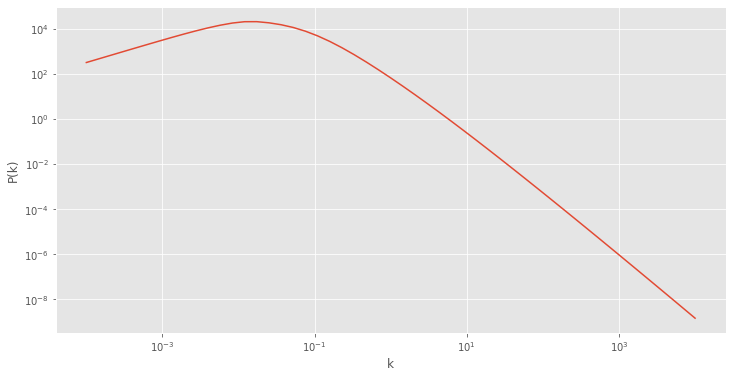

lin. variance for r  = 2 Mpc/h:  3.190151995243395
cell variance for kn = 2 h/Mpc:  6.490855375490081


In [3]:
# plot of power spectrum and variances
def linpower(k):
    """ return the normalised linear power """
    return pso.power(np.log(k), normalise = True)

k  = np.logspace(-4, 4, 51)
pk = linpower(k) # normalized power at z = 0

fig, ax1 = plt.subplots(1, 1, figsize = (12, 6))
ax1.loglog(k, pk); ax1.set_xlabel('k'); ax1.set_ylabel('P(k)')
plt.show()

print("lin. variance for r  = 2 Mpc/h: ", pso.var(2.))

print("cell variance for kn = 2 h/Mpc: ", pso.var(2., smooth = False))


## Measured Power Spectrum in Cell

In [4]:

# let kn = 2 h/Mpc
kn  = 2.

mps = pycic.CellPowerSpectrum(linpower, kn = kn, quantize = True)

In [5]:
# all k vectors
kx = 10**(np.random.uniform(-6, np.log10(kn), 1000_0))
ky = 10**(np.random.uniform(-6, np.log10(kn), 1000_0))
kz = 10**(np.random.uniform(-6, np.log10(kn), 1000_0))

k  = np.sqrt(kx**2 + ky**2 + kz**2)

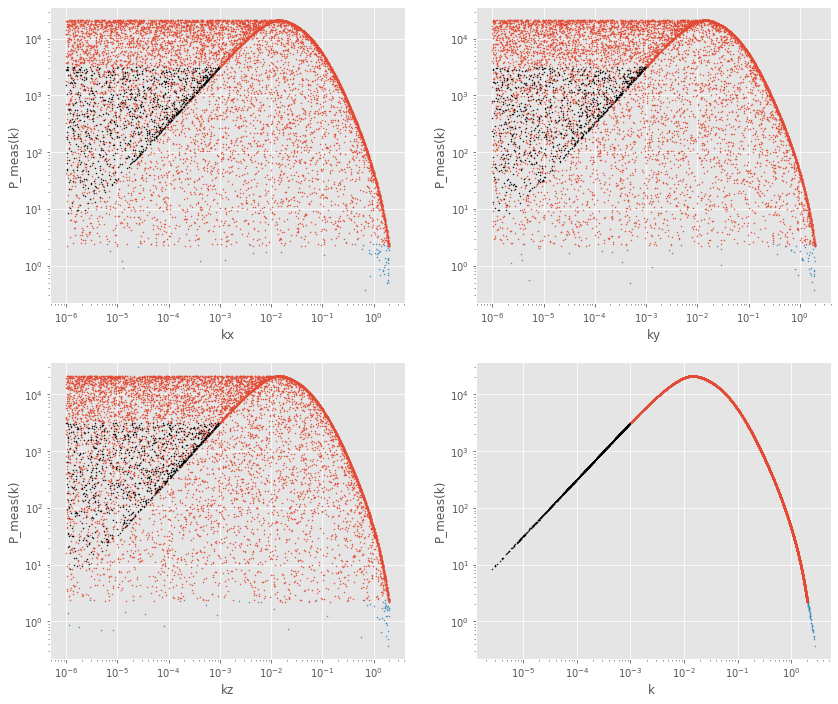

In [6]:
# full power spectrum (power law contd.) - non-binned version
mpk_nb = mps.power(kx, ky, kz, False)

fig, axs = plt.subplots(2, 2, figsize = (14, 12))

for _axi, _ki, _i in zip(axs.flatten(), [kx, ky, kz, k], "xyz "):
    mask = np.where(k > kn, True, False)
    _axi.loglog(_ki[mask], mpk_nb[mask], 'o', ms = .5, color = 'C1') # long k

    mask1 = np.where(k < 1e-3, True, False)
    _axi.loglog(_ki[mask1], mpk_nb[mask1], 'o', ms = .5, color = 'k') # short k


    mask2 = ~(mask | mask1)
    _axi.loglog(_ki[mask2], mpk_nb[mask2], 'o', ms = .5, color = 'C0')

    _axi.set_xlabel('k' + _i); _axi.set_ylabel('P_meas(k)')
        

plt.show()

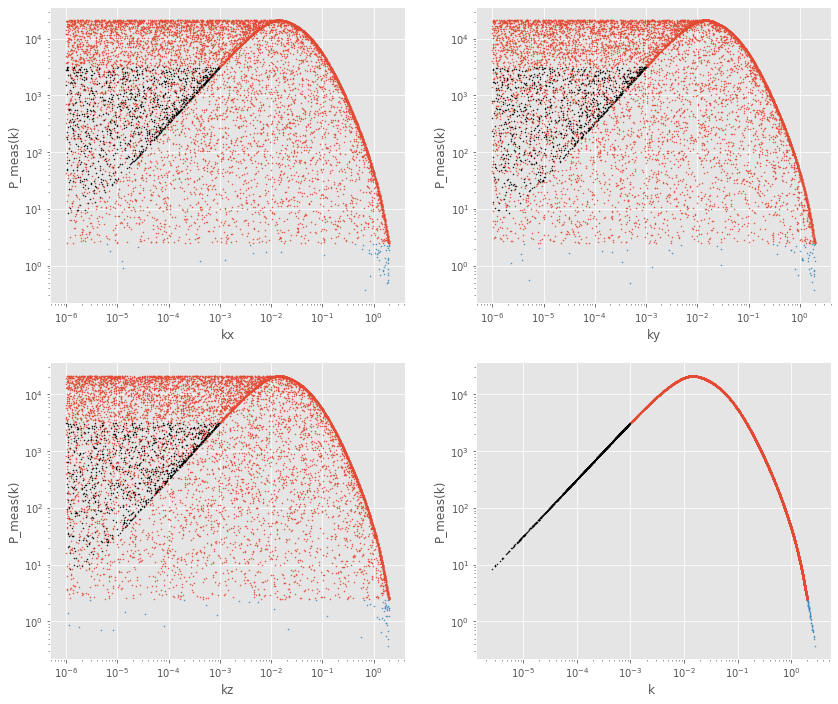

In [7]:

# full power spectrum (power law contd.) - binned version
mpk_b = mps.power(kx, ky, kz, True)

fig, axs = plt.subplots(2, 2, figsize = (14, 12))

for _axi, _ki, _i in zip(axs.flatten(), [kx, ky, kz, k], "xyz "):
    mask = np.where(k > kn, True, False)
    _axi.loglog(_ki[mask], mpk_b[mask], 'o', ms = .5, color = 'C1') # long k

    mask1 = np.where(k < 1e-3, True, False)
    _axi.loglog(_ki[mask1], mpk_b[mask1], 'o', ms = .5, color = 'k') # short k


    mask2 = ~(mask | mask1)
    _axi.loglog(_ki[mask2], mpk_b[mask2], 'o', ms = .5, color = 'C0')

    _axi.set_xlabel('k' + _i); _axi.set_ylabel('P_meas(k)')
        

plt.show()

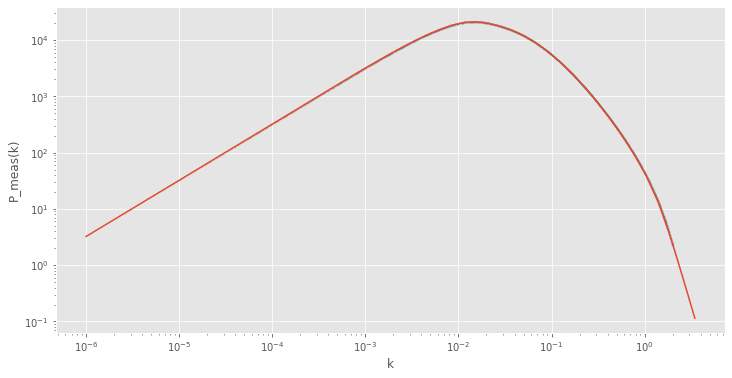

In [8]:
# isotropic version
kk = np.logspace(-6, np.log10(np.sqrt(3) * kn), 51)
pk = mps.powerk(kk)

fig, ax = plt.subplots(1, 1, figsize = (12, 6))

ax.loglog(k, mpk_nb, 'o', ms = 0.5, color = 'gray', alpha = 0.1)
ax.loglog(kk, pk, '-', color = 'C0') 

ax.set_xlabel('k'); ax.set_ylabel('P_meas(k)')

plt.show()